<a href="https://colab.research.google.com/github/Funfunke/Dynamite/blob/main/Capstone_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df_csv = pd.read_csv('Global_Superstore2.csv', encoding='latin1')
df_csv.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
print(df_csv.shape)

(51290, 24)


In [4]:
print(df_csv.isnull().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


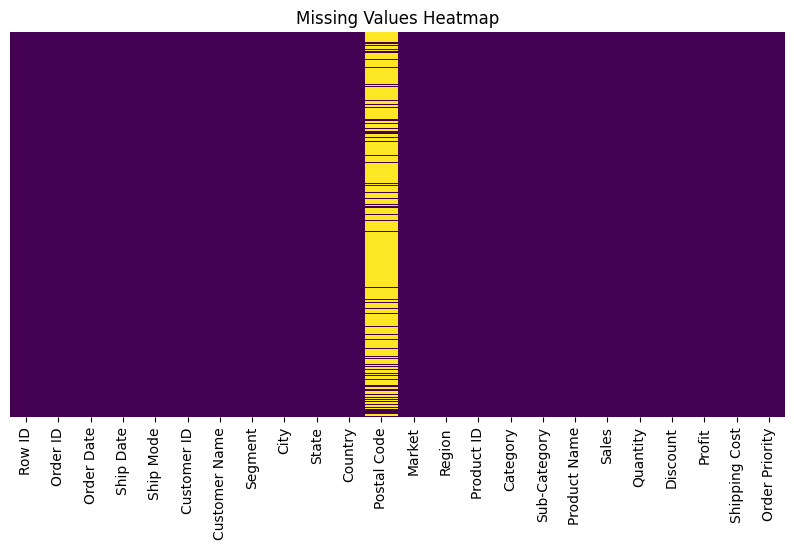

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df_csv.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


All the data in the columns are complete except for postal code where most of the data are missing. one way to of resolving this is to deal with this is to remove the rows with missing values. this is however not an option here as most rows are missing this and that would mean deleting most of out data. Additionally, the postal code column is not very important in the analysis being carried out as the state and city columns would help with identifying which region/area the purchases are being made from.
so an option could be deleting the entire column especially if it is not a required for the analysis we are undertaking.


In [6]:
print(df_csv.dtypes)

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object


In [7]:
df_csv['Order Date'] = pd.to_datetime(df_csv['Order Date'], format='%d-%m-%Y')
print(df_csv.dtypes)

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date                 object
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object


In [8]:
print(df_csv.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [9]:
# Question 1: Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer
df_csv.groupby('Customer Name')['Order ID'].count().sort_values(ascending=False)


,Order ID
Customer Name,
Muhammed Yedwab,108
Steven Ward,106
Gary Hwang,102
Patrick O'Brill,102
Bill Eplett,102
...,...
Andy Reiter,35
David Bremer,34
Darren Budd,31


In [10]:
# Question 2: Show all the purchases of Rick Hansen
df_csv[df_csv['Customer Name']== 'Rick Hansen']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.6500,7,0.00,762.1845,933.57,Critical
4,47221,SG-2013-4320,2013-11-05,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.9600,8,0.00,311.5200,903.04,Critical
331,32299,CA-2012-124891,2012-07-31,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,FUR-TA-10002903,Furniture,Tables,"Bevis Round Bullnose 29"" High Table Top",1090.7820,7,0.40,-290.8752,348.18,Critical
2069,9345,US-2013-116771,2013-05-01,01-05-2013,Same Day,RH-19495,Rick Hansen,Consumer,La Vega,La Vega,...,FUR-CH-10000326,Furniture,Chairs,"SAFCO Rocking Chair, Red",503.6640,7,0.20,138.4040,131.22,Critical
3424,12338,ES-2013-5957121,2013-09-14,15-09-2013,First Class,RH-19495,Rick Hansen,Consumer,Pamplona,Navarra,...,FUR-CH-10003249,Furniture,Chairs,"Office Star Steel Folding Chair, Black",714.2400,10,0.20,-178.5600,89.85,Medium
3439,4695,MX-2014-135069,2014-10-14,19-10-2014,Standard Class,RH-19495,Rick Hansen,Consumer,Cuiabá,Mato Grosso,...,FUR-CH-10000932,Furniture,Chairs,"Harbour Creations Executive Leather Armchair, Red",1268.9600,4,0.00,583.6800,89.52,Medium
3551,12337,ES-2013-5957121,2013-09-14,15-09-2013,First Class,RH-19495,Rick Hansen,Consumer,Pamplona,Navarra,...,TEC-AC-10003666,Technology,Accessories,"Memorex Router, Bluetooth",1231.0500,5,0.00,467.7000,87.44,Medium
3995,19778,ES-2014-2769035,2014-01-06,10-01-2014,Standard Class,RH-19495,Rick Hansen,Consumer,Nice,Provence-Alpes-Côte d'Azur,...,TEC-PH-10001708,Technology,Phones,"Cisco Audio Dock, with Caller ID",773.7975,5,0.15,63.6975,79.79,High
6621,19777,ES-2014-2769035,2014-01-06,10-01-2014,Standard Class,RH-19495,Rick Hansen,Consumer,Nice,Provence-Alpes-Côte d'Azur,...,TEC-PH-10004162,Technology,Phones,"Samsung Speaker Phone, Cordless",535.8825,5,0.15,12.5325,51.67,High
6955,29350,IN-2012-13961,2012-06-25,29-06-2012,Standard Class,RH-19495,Rick Hansen,Consumer,Newcastle,New South Wales,...,OFF-ST-10002650,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",743.0400,4,0.10,181.5600,49.14,High


In [11]:
#Question 3: what is the total contribution of each Segment to total purchase?
grouped_df_csv0=df_csv.groupby('Segment')['Order ID'].count().sort_values(ascending=False)
print(grouped_df_csv0)

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: Order ID, dtype: int64


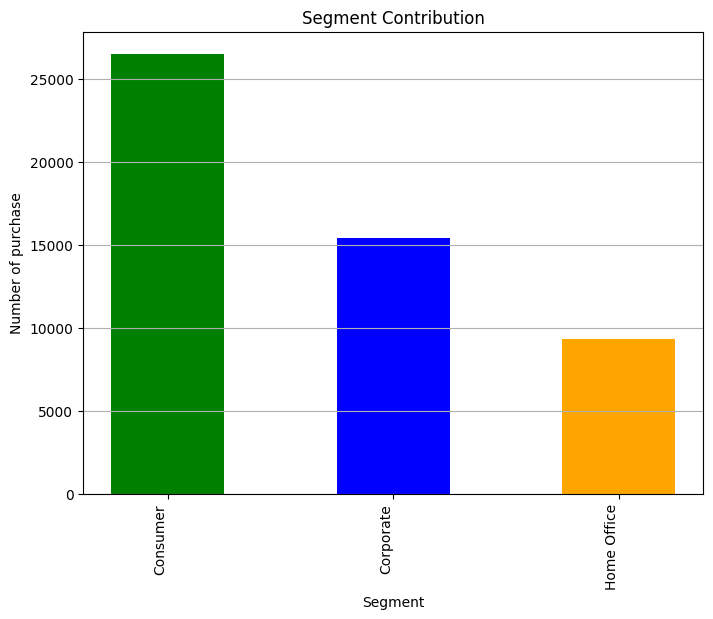

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(grouped_df_csv0.index.get_level_values('Segment'), grouped_df_csv0.values, width=0.5, color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Segment')
plt.ylabel('Number of purchase')
plt.title('Segment Contribution')
plt.grid(axis='y')
plt.xticks(rotation=90, ha='right')
plt.show()

In [13]:
# Question 4: Which state has top sales? top ten
grouped_df_sales = df_csv.groupby('State')['Order ID'].count().sort_values(ascending=False)
Top_sale_by_country =  grouped_df_sales.head(10)
print(Top_sale_by_country)


State
California                2001
England                   1499
New York                  1128
Texas                      985
Ile-de-France              981
New South Wales            781
North Rhine-Westphalia     719
Queensland                 717
San Salvador               615
Pennsylvania               587
Name: Order ID, dtype: int64


Text(0.5, 0, 'State')

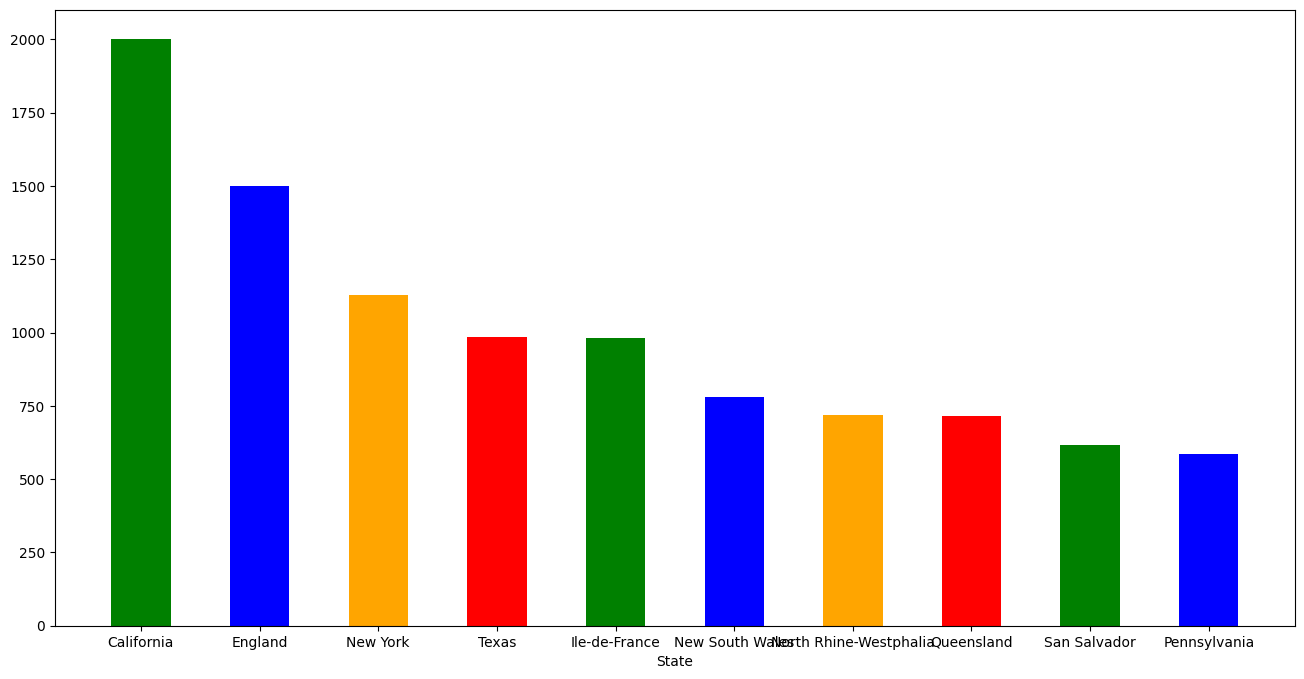

In [14]:
plt.figure(figsize=(16, 8))
plt.bar(Top_sale_by_country.index.get_level_values('State'), Top_sale_by_country.values, width=0.5, color=['green', 'blue', 'orange', 'red'])
plt.xlabel('State')

In [15]:
# Question 5: Which shipping mode is most popular? plot a bar chat to show compare the popularity of each mode.
grouped_df_csv1 = df_csv.groupby('Ship Mode')['Order ID'].count().sort_values(ascending=False)
print(grouped_df_csv1)

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Order ID, dtype: int64


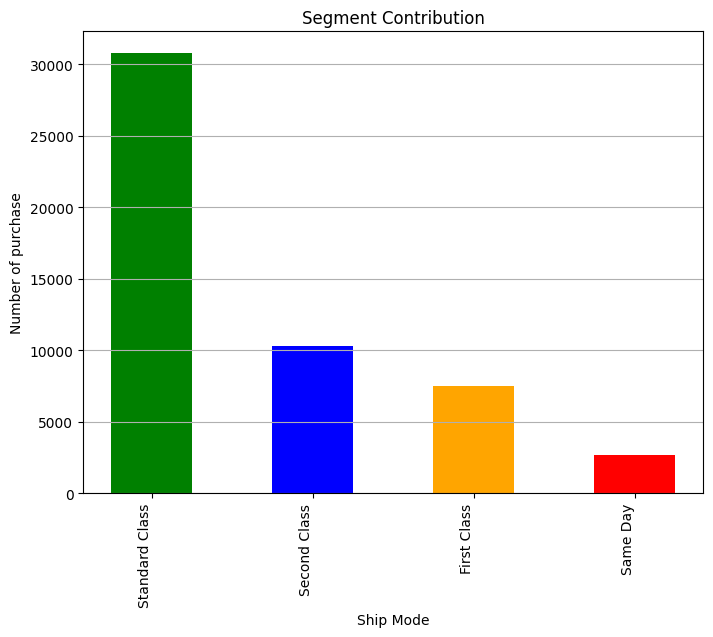

In [17]:
plt.figure(figsize=(8, 6))
plt.bar(grouped_df_csv1.index.get_level_values('Ship Mode'), grouped_df_csv1.values, width=0.5, color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Ship Mode')
plt.ylabel('Number of purchase')
plt.title('Segment Contribution')
plt.grid(axis='y')
plt.xticks(rotation=90, ha='right')
plt.show()

In [ ]:
# Question 6: Are the high frequent customers are contributing more revenue?
df_csv.groupby('Customer Name')['Sales'].sum().round(2).sort_values(ascending=False)


,Sales
Customer Name,
Tom Ashbrook,40488.07
Tamara Chand,37457.33
Greg Tran,35550.95
Christopher Conant,35187.08
Sean Miller,35170.93
...,...
Michael Oakman,5460.58
Sung Shariari,5328.46
Karen Seio,5324.97


In [18]:
# Question 6: Are the high frequent customers are contributing more revenue?
customer_freq = df_csv.groupby('Customer ID').size().reset_index(name='Purchase Frequency')
customer_revenue = df_csv.groupby('Customer ID')['Sales'].sum().reset_index()
customer_revenue.rename(columns={'Sales': 'Total Revenue'}, inplace=True)
customer_analysis = pd.merge(customer_freq, customer_revenue, on='Customer ID')
correlation = customer_analysis[['Purchase Frequency', 'Total Revenue']].corr()
print(correlation)


                    Purchase Frequency  Total Revenue
Purchase Frequency            1.000000       0.913539
Total Revenue                 0.913539       1.000000


In [ ]:
# Question 6: Are the high frequent customers are contributing more revenue?
print(customer_analysis['Purchase Frequency'].corr(customer_analysis['Total Revenue']))

0.9135394649999774


In [19]:
#Question 7: Are they also profitable - what is the profit margin across the buckets
customer_freq = df_csv.groupby('Customer ID').size().reset_index(name='Purchase Frequency')
customer_sales_profit = df_csv.groupby('Customer ID')[['Sales', 'Profit']].sum().reset_index()
customer_analysis = pd.merge(customer_freq, customer_sales_profit, on='Customer ID')
bins = [1, 5, 10, 20, 50, 100, float('inf')]
labels = ['1-5', '6-10', '11-20', '21-50', '51-100', '100+']
customer_analysis['Frequency Bucket'] = pd.cut(customer_analysis['Purchase Frequency'], bins=bins, labels=labels, right=True, include_lowest=True, duplicates='drop')
print(customer_analysis['Frequency Bucket'].isna().sum())
print(customer_analysis.head())


0
  Customer ID  Purchase Frequency        Sales      Profit Frequency Bucket
0    AA-10315                  42  13747.41300   447.69050            21-50
1    AA-10375                  42   5884.19500   677.47740            21-50
2    AA-10480                  38  17695.58978  1516.47518            21-50
3    AA-10645                  73  15343.89070  3051.43900           51-100
4      AA-315                   8   2243.25600   535.56600             6-10


In [20]:
# Question 8: who are the 20 most profitable customers
grouped_df_csv2 = df_csv.groupby('Customer Name')['Profit'].sum().round(2).sort_values(ascending=False)
top_20_customers = grouped_df_csv2.head(20)
print(top_20_customers)


Customer Name
Tamara Chand          8672.90
Raymond Buch          8453.05
Sanjit Chand          8205.38
Hunter Lopez          7816.57
Bill Eplett           7410.01
Harry Marie           6958.29
Susan Pistek          6484.41
Mike Gockenbach       6458.68
Adrian Barton         6417.28
Tom Ashbrook          6311.98
Jane Waco             6265.85
Daniel Raglin         6103.97
Sanjit Engle          6015.78
Bill Shonely          5968.91
Ellis Ballard         5848.75
Nathan Mautz          5789.12
Christopher Conant    5603.33
Keith Dawkins         5486.17
John Huston           5395.82
Greg Tran             5214.13
Name: Profit, dtype: float64


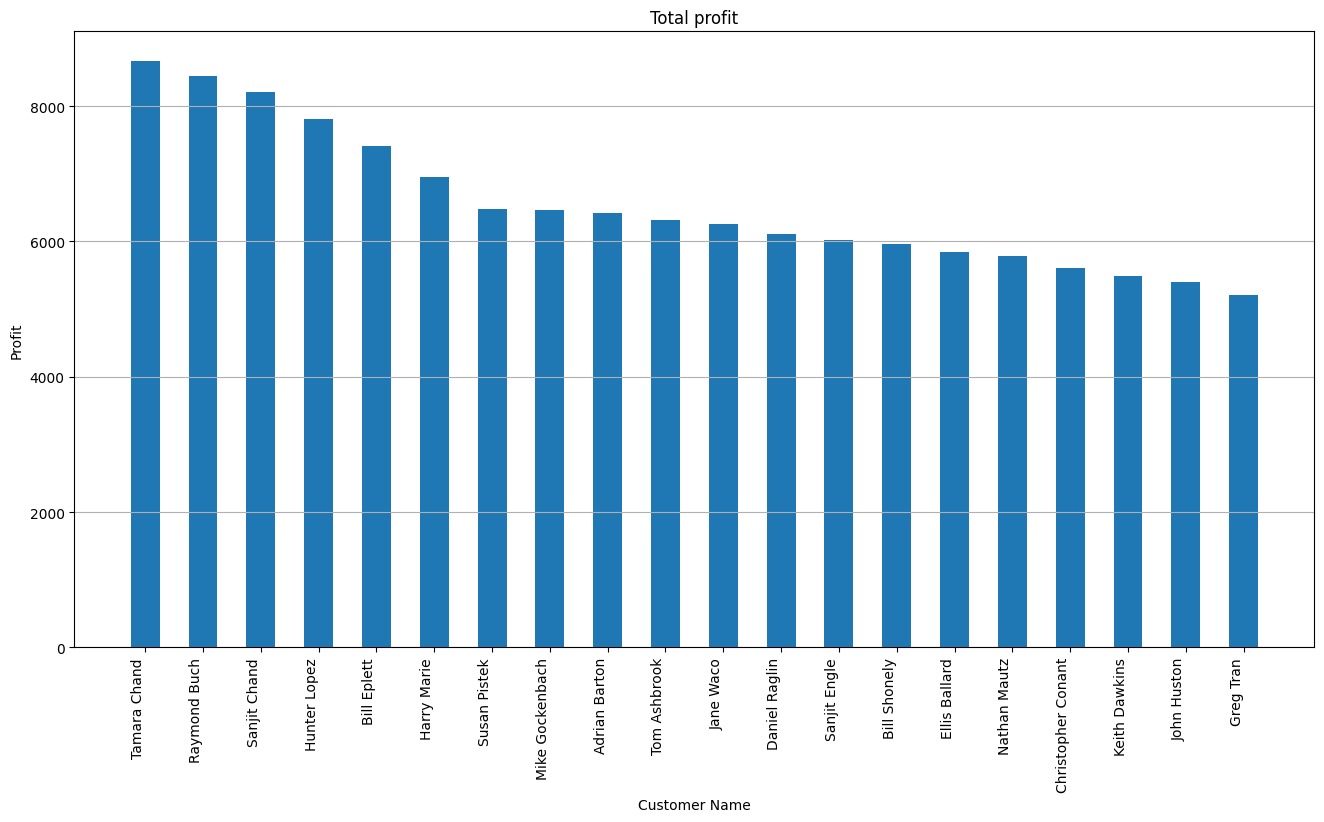

In [21]:
plt.figure(figsize=(16, 8))
plt.bar(top_20_customers.index.get_level_values('Customer Name'), top_20_customers.values, width=0.5)
plt.xlabel('Customer Name')
plt.ylabel('Profit')
plt.title('Total profit')
plt.grid(axis='y')
plt.xticks(rotation=90, ha='right')
plt.show()

In [22]:
#Question 9: Which customer segment is most profitable in each year.
df_csv['Order Date'] = pd.to_datetime(df_csv['Order Date'])
df_csv['Year'] = df_csv['Order Date'].dt.year
profit_by_segment_year = df_csv.groupby(['Segment','Year'])['Profit'].sum().round(2).sort_values(ascending=False)
print(profit_by_segment_year)


Segment      Year
Consumer     2014    257675.36
             2013    208427.73
             2012    165799.19
Corporate    2014    140196.75
             2013    125707.94
Consumer     2011    117337.49
Home Office  2014    106293.85
Corporate    2012     90556.70
             2011     84746.94
Home Office  2013     72799.56
             2012     51059.39
             2011     46856.38
Name: Profit, dtype: float64


In [23]:
#Question 10: How the customers are distributed across the countries
grouped_df_csv3=df_csv.groupby('Country')['Customer ID'].count().sort_values(ascending=False)
print(grouped_df_csv3)

Country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Eritrea             2
Swaziland           2
Burundi             2
Chad                2
Bahrain             2
Name: Customer ID, Length: 147, dtype: int64


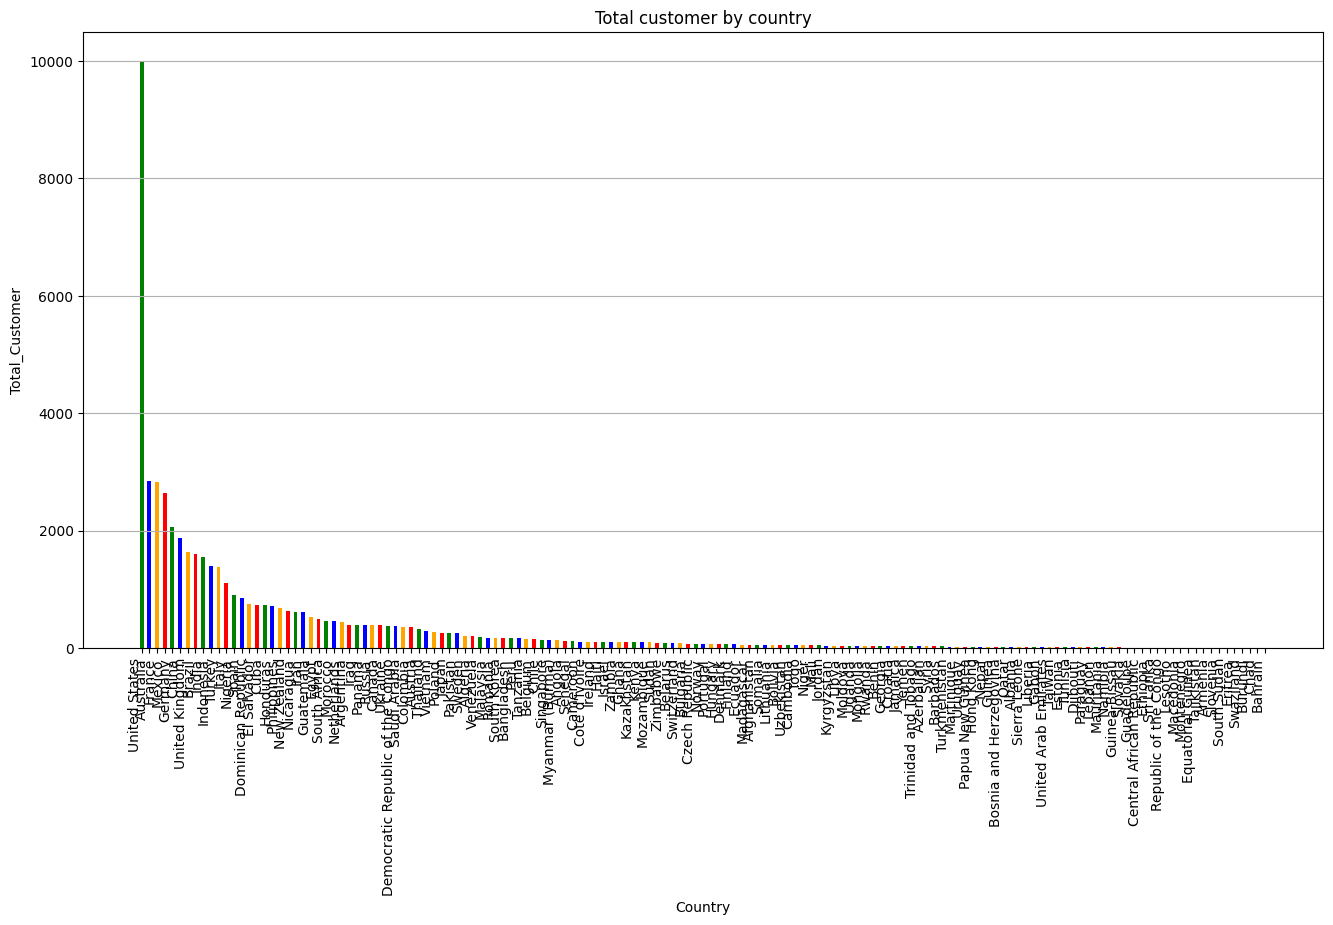

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.bar(grouped_df_csv3.index.get_level_values('Country'), grouped_df_csv3.values, width=0.5, color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Country')
plt.ylabel('Total_Customer')
plt.title('Total customer by country')
plt.grid(axis='y')
plt.xticks(rotation=90, ha='right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

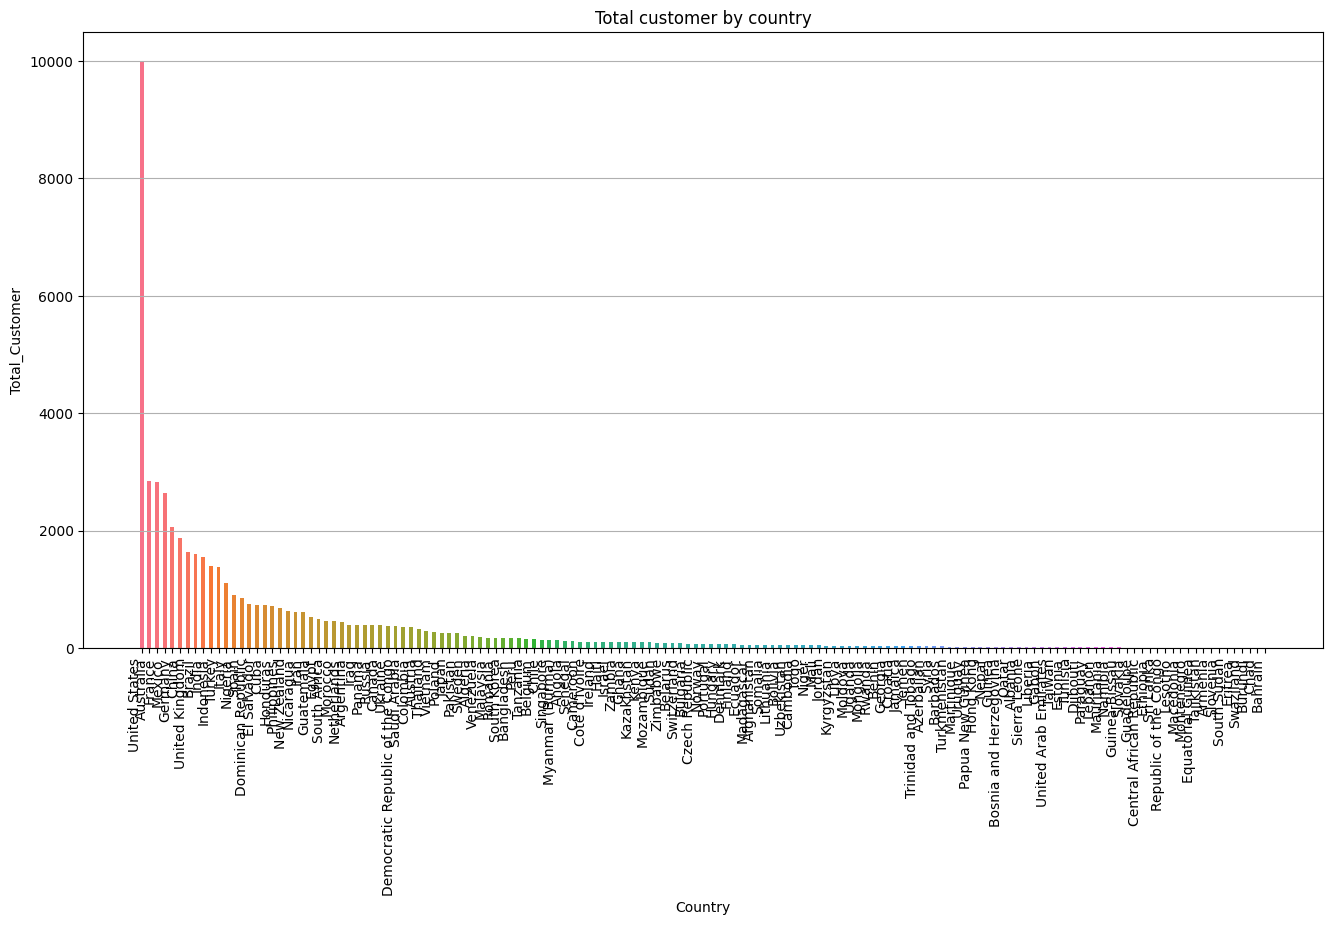

In [ ]:
unique_countries = grouped_df_csv3.index.get_level_values('Country')
colors = sns.color_palette('husl', len(unique_countries))
plt.figure(figsize=(16, 8))
plt.bar(unique_countries, grouped_df_csv3.values, width=0.5, color=colors)
plt.xlabel('Country')
plt.ylabel('Total_Customer')
plt.title('Total customer by country')
plt.grid(axis='y')
plt.xticks(rotation=90, ha='right')
plt.show()



In [36]:
# Question 11: Which country has top sales? Top 20 countries
grouped_df_csv4=df_csv.groupby('Country')['Sales'].sum().round(2).sort_values(ascending=False)

top_20_countries = grouped_df_csv4.head(20)
print(top_20_countries)


Country
United States         2297200.86
Australia              925235.85
France                 858931.08
China                  700562.02
Germany                628840.03
Mexico                 622590.62
India                  589650.10
United Kingdom         528576.30
Indonesia              404887.50
Brazil                 361106.42
Italy                  289709.66
Spain                  287146.68
Philippines            183420.16
El Salvador            177554.90
New Zealand            172020.62
Cuba                   158854.94
Nicaragua              149687.06
Guatemala              131602.47
Dominican Republic     126140.58
Iran                   113746.11
Name: Sales, dtype: float64


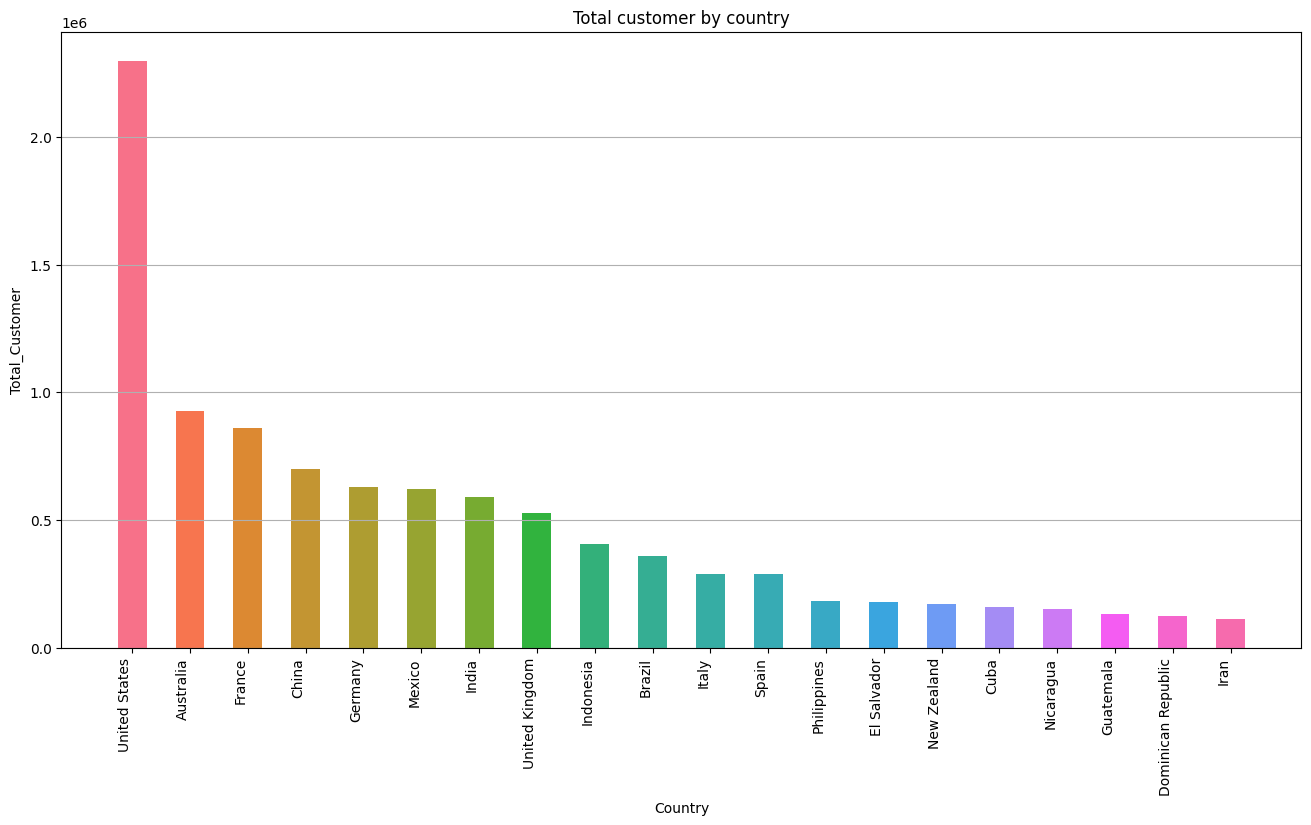

In [37]:
top_20_countries = grouped_df_csv4.head(20)
colors = sns.color_palette('husl', len(top_20_countries))
plt.figure(figsize=(16, 8))
plt.bar(top_20_countries.index, top_20_countries.values, width=0.5, color=colors)
plt.xlabel('Country')
plt.ylabel('Total_Customer')
plt.title('Total customer by country')
plt.grid(axis='y')
plt.xticks(rotation=90, ha='right')
plt.show()


In [ ]:
# Question 12: Which are the top 5 profit-making product types on a yearly basis

df_csv['Year']=df_csv['Order Date'].dt.year
df_csv.groupby(['Sub-Category','Year'])['Profit'].sum().sort_values(ascending=False)


Sub-Category  Year
Copiers       2014    104048.53596
              2013     72300.69118
Phones        2014     70657.64130
Bookcases     2014     63219.05050
Phones        2011     53927.48950
                          ...     
Fasteners     2011      1936.91690
Tables        2012     -8421.69860
              2011    -11075.29450
              2013    -14040.48720
              2014    -30545.90840
Name: Profit, Length: 68, dtype: float64

In [ ]:
df_csv['Year'] = df_csv['Order Date'].dt.year
grouped_df_csv5 = df_csv.groupby(['Year', 'Sub-Category'])['Profit'].sum().round(2)
grouped_df_csv5 = grouped_df_csv5.groupby('Year', group_keys=False).apply(lambda x: x.nlargest(5))

print(grouped_df_csv5)

Year  Sub-Category
2011  Phones           53927.49
      Copiers          30375.09
      Chairs           29943.16
      Bookcases        27518.86
      Appliances       22838.44
2012  Copiers          51843.23
      Phones           45223.05
      Accessories      33507.10
      Chairs           28755.35
      Bookcases        28137.27
2013  Copiers          72300.69
      Phones           46908.83
      Bookcases        43049.24
      Appliances       41485.52
      Chairs           40449.49
2014  Copiers         104048.54
      Phones           70657.64
      Bookcases        63219.05
      Appliances       53040.50
      Accessories      41593.93
Name: Profit, dtype: float64


In [25]:
# Question 13: Which sub category has been most profitable over the years? plot a chart
grouped_df_csv6 = df_csv.groupby('Sub-Category')['Profit'].sum().round(2).sort_values(ascending=False)
print(grouped_df_csv6)

Sub-Category
Copiers        258567.55
Phones         216717.01
Bookcases      161924.42
Appliances     141680.59
Chairs         140396.27
Accessories    129626.31
Storage        108461.49
Binders         72449.85
Paper           59207.68
Machines        58867.87
Art             57953.91
Furnishings     46967.43
Envelopes       29601.12
Supplies        22583.26
Labels          15010.51
Fasteners       11525.42
Tables         -64083.39
Name: Profit, dtype: float64


In [28]:
# most profitable sub category
grouped_df_csv6 = df_csv.groupby('Sub-Category')['Profit'].sum().round(2).sort_values(ascending=False)
most_profitable_sub_category = grouped_df_csv6.idxmax()
print(most_profitable_sub_category)


Copiers


In [30]:
#top 10 most profitable and plot a chart to show their contribution.
grouped_df_csv6 = df_csv.groupby('Sub-Category')['Profit'].sum().round(2).sort_values(ascending=False)
top_10_most_profitable = grouped_df_csv6.head(10)
print(top_10_most_profitable)

Sub-Category
Copiers        258567.55
Phones         216717.01
Bookcases      161924.42
Appliances     141680.59
Chairs         140396.27
Accessories    129626.31
Storage        108461.49
Binders         72449.85
Paper           59207.68
Machines        58867.87
Name: Profit, dtype: float64


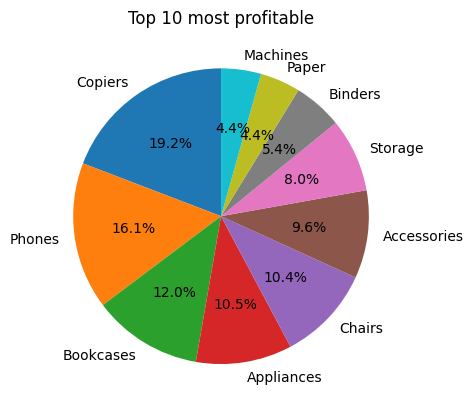

In [32]:
import matplotlib.pyplot as plt
labels = top_10_most_profitable.index.tolist()
plt.pie(top_10_most_profitable, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 most profitable')
plt.show()

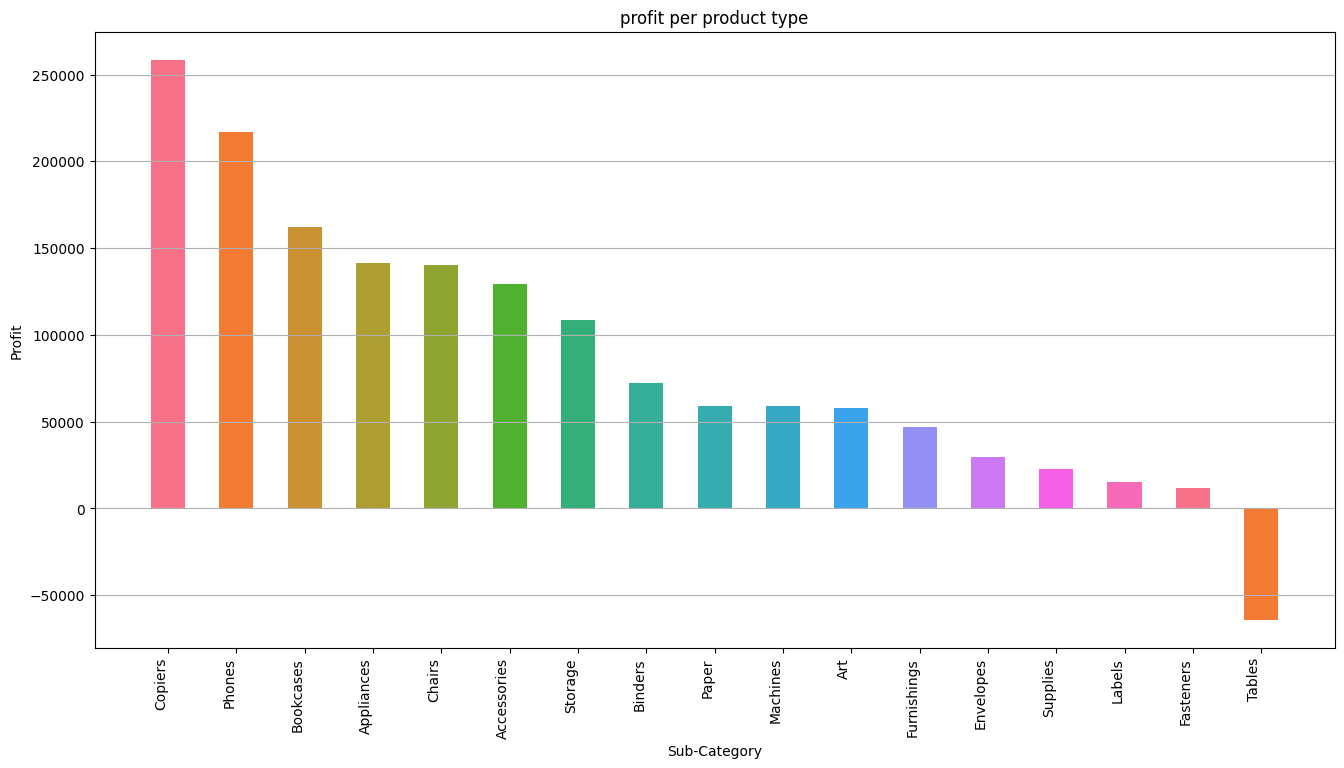

In [39]:
colors = sns.color_palette('husl', len('grouped_df_csv6'))
plt.figure(figsize=(16, 8))
plt.bar(grouped_df_csv6.index, grouped_df_csv6.values, width=0.5, color=colors)
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.title('profit per product type')
plt.grid(axis='y')
plt.xticks(rotation=90, ha='right')
plt.show()



In [43]:
# Question 14: How is the product price varying with sales - Is there any increase in sales with the decrease in price at a day level
df_csv['Product_price'] = df_csv['Sales'] / df_csv['Quantity']  # Ensure this column exists
grouped_df_csv7 = df_csv.groupby('Product_price')['Sales'].sum().round(2).sort_values(ascending=False)
print(grouped_df_csv7)

Product_price
637.500     33150.00
651.390     30615.33
3499.990    24499.93
643.980     23827.26
568.470     23307.27
              ...   
1.167           1.17
1.044           1.04
0.876           0.88
0.836           0.84
0.444           0.44
Name: Sales, Length: 14738, dtype: float64


In [46]:
daily_trend = df_csv.groupby('Order Date').agg(
    avg_price=('Product_price', 'mean'),
    total_sales=('Sales', 'sum')
).reset_index()
print(daily_trend)

     Order Date   avg_price  total_sales
0    2011-01-01   54.352000    808.56300
1    2011-01-02  314.220000    314.22000
2    2011-01-03   91.073755   4503.53720
3    2011-01-04   40.769195   2808.87024
4    2011-01-05   86.517143   3662.31000
...         ...         ...          ...
1425 2014-12-27   77.472310  13421.26376
1426 2014-12-28   37.876000   1647.17400
1427 2014-12-29   66.939782  25109.28878
1428 2014-12-30   63.326094  16831.61480
1429 2014-12-31   63.059547  13257.95430

[1430 rows x 3 columns]


In [ ]:

print(sales_analysis['avg_pric'].corr(sales_analysis['total_sales']))